In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import pymongo

In [3]:
price_regression = pd.read_csv("data/skprice.csv")
price_regression

,appid,name,developer,publisher,score_rank,positive,negative,owners,average_forever,average_2weeks,...,Photo Editing,Video Production,MMO,Software,Audio,Sports,Education,has_multiplayer,has_dlc,Developer_score
0,10,Counter-Strike,Valve,Valve,NaN,191894,4915,"10,000,000 .. 20,000,000",10534,1525,...,False,False,False,False,False,False,False,True,False,AAA
1,20,Team Fortress Classic,Valve,Valve,NaN,5365,891,"2,000,000 .. 5,000,000",1003,0,...,False,False,False,False,False,False,False,True,False,AAA
2,30,Day of Defeat,Valve,Valve,NaN,4972,552,"5,000,000 .. 10,000,000",931,0,...,False,False,False,False,False,False,False,True,False,AAA
3,40,Deathmatch Classic,Valve,Valve,NaN,1839,409,"5,000,000 .. 10,000,000",1204,0,...,False,False,False,False,False,False,False,True,False,AAA
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,13083,651,"5,000,000 .. 10,000,000",1150,0,...,False,False,False,False,False,False,False,False,False,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,1812960,Floor is Lava,galesoozka,galesoozka,NaN,24,2,"200,000 .. 500,000",0,0,...,False,False,False,False,False,False,False,False,False,AAA
4529,1821060,Find The Sunbed,DS | Voxaol,DS | Voxaol,NaN,5,0,"200,000 .. 500,000",0,0,...,False,False,False,False,False,False,False,True,False,AAA
4530,1827870,DarkHouse,VD Games,VD Games,NaN,12,5,"100,000 .. 200,000",0,0,...,False,False,False,False,False,False,False,False,False,AAA
4531,1844190,Deep Cave,DunkenD,galesoozka,NaN,9,1,"100,000 .. 200,000",0,0,...,False,False,False,False,False,False,False,False,False,AAA


In [4]:
merge_data = pd.read_csv("data/merged_data_final.csv")
merge_data

,Unnamed: 0,Unnamed: 0.1,appid,name,developer,publisher,score_rank,positive,negative,userscore,...,Racing,Photo Editing,Video Production,MMO,Software,Audio,Sports,Education,has_multiplayer,has_dlc
0,0,0.0,10.0,Counter-Strike,Valve,Valve,NaN,191894.0,4915.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,1,1.0,20.0,Team Fortress Classic,Valve,Valve,NaN,5365.0,891.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,2,2.0,30.0,Day of Defeat,Valve,Valve,NaN,4972.0,552.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,3,3.0,40.0,Deathmatch Classic,Valve,Valve,NaN,1839.0,409.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,4,4.0,50.0,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,13083.0,651.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,6400,NaN,NaN,IdleOn - The Idle MMO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6401,6401,NaN,NaN,VRoid Studio v1.2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6402,6402,NaN,NaN,Spiritwish,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6403,6403,NaN,NaN,Battlefield™ 2042,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [5]:
merge_data_clean = merge_data.drop(columns="Unnamed: 0")
merge_data_clean = merge_data_clean.drop(columns="Unnamed: 0.1")
merge_data_clean = merge_data_clean.drop(columns="score_rank")
merge_data_clean = merge_data_clean.drop(columns="userscore")
merge_data_clean = merge_data_clean.drop(columns="dlc")
merge_data_clean = merge_data_clean.drop(columns="price_overview")
merge_data_clean = merge_data_clean.drop(columns="genres")
merge_data_clean = merge_data_clean.drop(columns="steam_appid")
# merge_data_clean = merge_data_clean.drop(columns="appid")
merge_data_clean = merge_data_clean.drop_duplicates()
merge_data_clean = merge_data_clean.sort_values(by=["initialprice"])
merge_data_clean = merge_data_clean[merge_data_clean.initialprice > 0]
# print(merge_data_clean.columns)
print(merge_data_clean)

          appid                                name  \
3735   541380.0                           PhysDrive   
2932   411560.0                     Reveal The Deep   
1831   293180.0  Overcast - Walden and the Werewolf   
5973  1693390.0                        XOMBEE MPFPS   
4080   608990.0                The Archotek Project   
...         ...                                 ...   
4789   863550.0                            HITMAN 2   
3953   585410.0          GameMaker Studio 2 Desktop   
1096   230820.0             The Night of the Rabbit   
774    203830.0     The Dark Eye: Chains of Satinav   
5687  1325400.0     VEGAS Pro 18 Edit Steam Edition   

                      developer                  publisher  positive  \
3735           Royal Deal Games           Royal Deal Games      46.0   
2932          Lazy Monday Games            Lazy Monday Ltd    1171.0   
1831           Microblast Games                SA Industry    1618.0   
5973    Christopher V. Costello     ChristopherCgam

In [6]:
print(merge_data_clean["price"].describe())

count     4537.000000
mean      1492.240026
std       1290.377695
min         49.000000
25%        499.000000
50%        999.000000
75%       1999.000000
max      14900.000000
Name: price, dtype: float64


In [7]:
another_merge_df = pd.merge(merge_data_clean, price_regression, how="outer", on="appid")
another_merge_df

,appid,name_x,developer_x,publisher_x,positive_x,negative_x,owners_x,average_forever_x,average_2weeks_x,median_forever,...,Photo Editing_y,Video Production_y,MMO_y,Software_y,Audio_y,Sports_y,Education_y,has_multiplayer_y,has_dlc_y,Developer_score
0,541380.0,PhysDrive,Royal Deal Games,Royal Deal Games,46.0,52.0,"100,000 .. 200,000",0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,AAA
1,411560.0,Reveal The Deep,Lazy Monday Games,Lazy Monday Ltd,1171.0,222.0,"100,000 .. 200,000",39.0,0.0,55.0,...,False,False,False,False,False,False,False,True,False,AAA
2,293180.0,Overcast - Walden and the Werewolf,Microblast Games,SA Industry,1618.0,1072.0,"1,000,000 .. 2,000,000",216.0,0.0,234.0,...,False,False,False,False,False,False,False,False,False,AAA
3,1693390.0,XOMBEE MPFPS,Christopher V. Costello,ChristopherCgaming LLC,3.0,0.0,"100,000 .. 200,000",0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,AAA
4,608990.0,The Archotek Project,The Archotek Project Team,The Archotek Project Team,411.0,327.0,"200,000 .. 500,000",982.0,0.0,31.0,...,False,False,False,False,False,False,False,True,False,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,863550.0,HITMAN 2,IO Interactive A/S,IO Interactive A/S,58009.0,5594.0,"5,000,000 .. 10,000,000",870.0,68.0,244.0,...,False,False,False,False,False,False,False,True,False,AAA
4533,585410.0,GameMaker Studio 2 Desktop,YoYo Games Ltd.,YoYo Games Ltd.,1557.0,270.0,"100,000 .. 200,000",2747.0,0.0,2747.0,...,False,False,False,True,False,False,True,False,False,AAA
4534,230820.0,The Night of the Rabbit,Daedalic Entertainment,Daedalic Entertainment,2391.0,272.0,"200,000 .. 500,000",575.0,0.0,624.0,...,False,False,False,False,False,False,False,False,False,AAA
4535,203830.0,The Dark Eye: Chains of Satinav,Daedalic Entertainment,Daedalic Entertainment,1729.0,273.0,"200,000 .. 500,000",316.0,0.0,408.0,...,False,False,False,False,False,False,False,False,False,AAA


In [8]:
another_merge_df
new_owner = another_merge_df["owners_x"].str.split(" ", n = 1, expand = True)
another_merge_df["owner_range_1"] = new_owner[0]
another_merge_df["owner_range_2"] = new_owner[1]

In [9]:
ages = another_merge_df["appid"]
ages = ages.sort_values()
range_of_ages = []
for age in ages: 
    if age < 1000:
        range_of_ages.append(20)
    elif age < 100000:
        range_of_ages.append(15), 
    elif age < 1000000:
        range_of_ages.append(10)
    elif age < 1500000: 
        range_of_ages.append(5)
    else: 
        range_of_ages.append(3)



In [10]:
another_merge_df.sort_values(by="appid")


,appid,name_x,developer_x,publisher_x,positive_x,negative_x,owners_x,average_forever_x,average_2weeks_x,median_forever,...,MMO_y,Software_y,Audio_y,Sports_y,Education_y,has_multiplayer_y,has_dlc_y,Developer_score,owner_range_1,owner_range_2
2141,10.0,Counter-Strike,Valve,Valve,191894.0,4915.0,"10,000,000 .. 20,000,000",10534.0,1525.0,309.0,...,False,False,False,False,False,True,False,AAA,"10,000,000",".. 20,000,000"
746,20.0,Team Fortress Classic,Valve,Valve,5365.0,891.0,"2,000,000 .. 5,000,000",1003.0,0.0,11.0,...,False,False,False,False,False,True,False,AAA,"2,000,000",".. 5,000,000"
730,30.0,Day of Defeat,Valve,Valve,4972.0,552.0,"5,000,000 .. 10,000,000",931.0,0.0,19.0,...,False,False,False,False,False,True,False,AAA,"5,000,000",".. 10,000,000"
728,40.0,Deathmatch Classic,Valve,Valve,1839.0,409.0,"5,000,000 .. 10,000,000",1204.0,0.0,5.0,...,False,False,False,False,False,True,False,AAA,"5,000,000",".. 10,000,000"
748,50.0,Half-Life: Opposing Force,Gearbox Software,Valve,13083.0,651.0,"5,000,000 .. 10,000,000",1150.0,0.0,130.0,...,False,False,False,False,False,False,False,AAA,"5,000,000",".. 10,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,1812960.0,Floor is Lava,galesoozka,galesoozka,24.0,2.0,"200,000 .. 500,000",0.0,0.0,0.0,...,False,False,False,False,False,False,False,AAA,"200,000",".. 500,000"
467,1821060.0,Find The Sunbed,DS | Voxaol,DS | Voxaol,5.0,0.0,"200,000 .. 500,000",0.0,0.0,0.0,...,False,False,False,False,False,True,False,AAA,"200,000",".. 500,000"
787,1827870.0,DarkHouse,VD Games,VD Games,12.0,5.0,"100,000 .. 200,000",0.0,0.0,0.0,...,False,False,False,False,False,False,False,AAA,"100,000",".. 200,000"
3989,1844190.0,Deep Cave,DunkenD,galesoozka,9.0,1.0,"100,000 .. 200,000",0.0,0.0,0.0,...,False,False,False,False,False,False,False,AAA,"100,000",".. 200,000"


In [11]:
another_merge_df["age"] = range_of_ages

In [12]:
another_merge_df

,appid,name_x,developer_x,publisher_x,positive_x,negative_x,owners_x,average_forever_x,average_2weeks_x,median_forever,...,Software_y,Audio_y,Sports_y,Education_y,has_multiplayer_y,has_dlc_y,Developer_score,owner_range_1,owner_range_2,age
0,541380.0,PhysDrive,Royal Deal Games,Royal Deal Games,46.0,52.0,"100,000 .. 200,000",0.0,0.0,0.0,...,False,False,False,False,False,False,AAA,"100,000",".. 200,000",20
1,411560.0,Reveal The Deep,Lazy Monday Games,Lazy Monday Ltd,1171.0,222.0,"100,000 .. 200,000",39.0,0.0,55.0,...,False,False,False,False,True,False,AAA,"100,000",".. 200,000",20
2,293180.0,Overcast - Walden and the Werewolf,Microblast Games,SA Industry,1618.0,1072.0,"1,000,000 .. 2,000,000",216.0,0.0,234.0,...,False,False,False,False,False,False,AAA,"1,000,000",".. 2,000,000",20
3,1693390.0,XOMBEE MPFPS,Christopher V. Costello,ChristopherCgaming LLC,3.0,0.0,"100,000 .. 200,000",0.0,0.0,0.0,...,False,False,False,False,True,False,AAA,"100,000",".. 200,000",20
4,608990.0,The Archotek Project,The Archotek Project Team,The Archotek Project Team,411.0,327.0,"200,000 .. 500,000",982.0,0.0,31.0,...,False,False,False,False,True,False,AAA,"200,000",".. 500,000",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,863550.0,HITMAN 2,IO Interactive A/S,IO Interactive A/S,58009.0,5594.0,"5,000,000 .. 10,000,000",870.0,68.0,244.0,...,False,False,False,False,True,False,AAA,"5,000,000",".. 10,000,000",3
4533,585410.0,GameMaker Studio 2 Desktop,YoYo Games Ltd.,YoYo Games Ltd.,1557.0,270.0,"100,000 .. 200,000",2747.0,0.0,2747.0,...,True,False,False,True,False,False,AAA,"100,000",".. 200,000",3
4534,230820.0,The Night of the Rabbit,Daedalic Entertainment,Daedalic Entertainment,2391.0,272.0,"200,000 .. 500,000",575.0,0.0,624.0,...,False,False,False,False,False,False,AAA,"200,000",".. 500,000",3
4535,203830.0,The Dark Eye: Chains of Satinav,Daedalic Entertainment,Daedalic Entertainment,1729.0,273.0,"200,000 .. 500,000",316.0,0.0,408.0,...,False,False,False,False,False,False,AAA,"200,000",".. 500,000",3


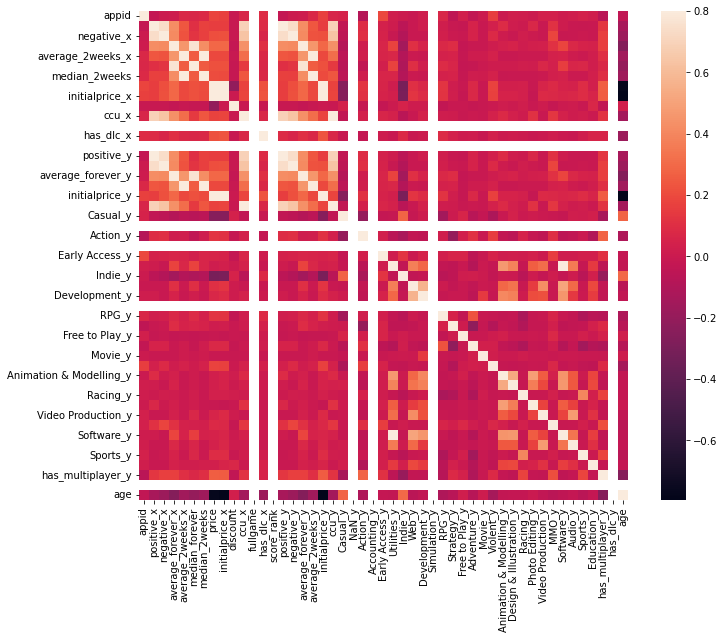

In [74]:
corrmat = another_merge_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [75]:
from sklearn import preprocessing
y = another_merge_df["price"]
prepare_df = another_merge_df.apply(preprocessing.LabelEncoder().fit_transform)
y.describe()

count     4537.000000
mean      1492.240026
std       1290.377695
min         49.000000
25%        499.000000
50%        999.000000
75%       1999.000000
max      14900.000000
Name: price, dtype: float64

C:\Users\Zach\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


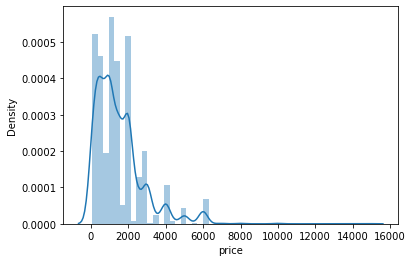

In [76]:
sns.distplot(y);

In [77]:
target=prepare_df["price"]
feature_names = prepare_df.columns

In [78]:
conn = "mongodb://localhost:27017/price_data"
client = pymongo.MongoClient(conn)
db = client.ppDB
price_db = db.pricedata
price_db.drop()
data = prepare_df.to_dict(orient="records")
price_db.insert_many(data)

In [79]:
prepare_df.drop("price", axis=1)
prepare_df.drop("Developer_score", axis=1)

,appid,name_x,developer_x,publisher_x,positive_x,negative_x,owners_x,average_forever_x,average_2weeks_x,median_forever,...,MMO_y,Software_y,Audio_y,Sports_y,Education_y,has_multiplayer_y,has_dlc_y,owner_range_1,owner_range_2,age
0,2993,2706,2125,1435,42,52,3,0,0,0,...,0,0,0,0,0,0,0,3,6,4
1,2403,2965,1435,994,853,222,3,38,0,55,...,0,0,0,0,0,1,0,3,6,4
2,1581,2610,1586,1446,1082,888,1,212,0,234,...,0,0,0,0,0,0,0,1,3,4
3,4509,4390,487,365,3,0,3,0,0,0,...,0,0,0,0,0,1,0,3,6,4
4,3257,3696,2502,1691,338,327,7,834,0,31,...,0,0,0,0,0,1,0,7,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,3745,1652,1195,846,3136,1583,8,771,66,244,...,0,0,0,0,0,1,0,8,1,0
4533,3154,1521,2816,1897,1057,270,3,1301,0,1205,...,0,1,0,0,1,0,0,3,6,0
4534,943,3837,644,462,1417,272,7,550,0,600,...,0,0,0,0,0,0,0,7,10,0
4535,679,3734,644,462,1139,273,7,312,0,408,...,0,0,0,0,0,0,0,7,10,0


In [80]:
prepare_df["price"]

0         8
1         9
2         0
3         9
4         9
       ... 
4532    117
4533    117
4534     66
4535     66
4536    118
Name: price, Length: 4537, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prepare_df, target, test_size=0.75, random_state=42)

In [82]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test,y_test))


1.0
0.9432853364678225


In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred_test_clf = clf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_clf)))
print(r2_score(y_test,pred_test_clf))

1.5456611753543994
0.997352267635204


Text(0.5, 1.0, 'Residual Plot')

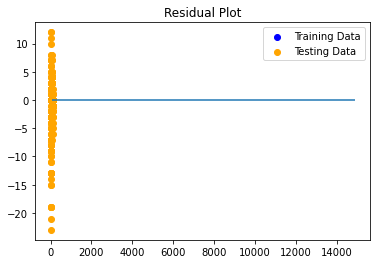

In [84]:
plt.scatter(clf.predict(X_train), clf.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(clf.predict(X_test), clf.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [85]:
sorted(zip(clf.feature_importances_, feature_names), reverse=True)

[(0.7332289099680792, 'price'),
 (0.10772255611422407, 'initialprice_x'),
 (0.09693619637853415, 'initialprice_y'),
 (0.020165645223469954, 'discount'),
 (0.004676661063660955, 'appid'),
 (0.0028186173127311906, 'demos'),
 (0.0026503416522696264, 'Web_x'),
 (0.002626302272203689, 'movies'),
 (0.002487189769931091, 'name_y'),
 (0.002418962619134976, 'languages_y'),
 (0.0022701033810343632, 'categories'),
 (0.002257698444525979, 'average_forever_y'),
 (0.001935170095307981, 'average_forever_x'),
 (0.0018727452535238515, 'metacritic'),
 (0.0017416530857771834, 'release_date'),
 (0.0012901133968719874, 'publishers'),
 (0.0012901133968719874, 'developer_y'),
 (0.0009675850476539905, 'website'),
 (0.0009675850476539905, 'publisher_y'),
 (0.0009675850476539905, 'positive_x'),
 (0.0009675850476539905, 'owner_range_2'),
 (0.0009675850476539905, 'negative_y'),
 (0.0009675850476539905, 'name_x'),
 (0.0009675850476539905, 'content_descriptors'),
 (0.0009675850476539905, 'ccu_y'),
 (0.0009675850476

In [29]:
test_data = prepare_df.iloc[:2000]
prod_data = prepare_df.iloc[2000:]

In [86]:
model_data = prepare_df[["initialprice_x", "owner_range_2",'age', "has_dlc_x", "has_multiplayer_y", "price"]]

In [95]:

X = model_data[["initialprice_x", "owner_range_2",'age',"has_dlc_x", "has_multiplayer_y"]]
y = model_data["price"]
y.describe()

count    4537.000000
mean       61.134009
std        29.846996
min         0.000000
25%        35.000000
50%        55.000000
75%        86.000000
max       118.000000
Name: price, dtype: float64

In [88]:
model_data.to_csv("data/predict.csv")

In [89]:
conn = "mongodb://localhost:27017/price_data"
client = pymongo.MongoClient(conn)
db = client.ppDB
predict_db = db.predict
predict_db.drop()
data = model_data.to_dict(orient="records")
predict_db.insert_many(data)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [91]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler


StandardScaler()

In [92]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.541005291005291
Testing Score: 0.5156456588805641


C:\Users\Zach\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred_test_model = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_model)))
print(r2_score(y_test,pred_test_model))

11.873061531374693
0.8435035978280929


Text(0.5, 1.0, 'Residual Plot')

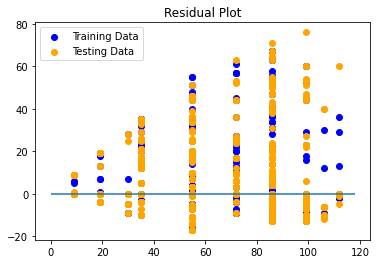

In [94]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [63]:
from sklearn import preprocessing
target = model_data["price"]
prepare_df = model_data.apply(preprocessing.LabelEncoder().fit_transform)
target.describe()

count    4537.000000
mean       61.134009
std        29.846996
min         0.000000
25%        35.000000
50%        55.000000
75%        86.000000
max       118.000000
Name: price, dtype: float64

In [64]:
model_data = model_data.drop(columns="price")

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data, target, test_size=0.8, random_state=42)

In [66]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test,y_test))

0.9547960308710033
0.8820936639118457


In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred_test_clf = clf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_clf)))
print(r2_score(y_test,pred_test_clf))

10.993875079161048
0.8657276507121316


Text(0.5, 1.0, 'Residual Plot')

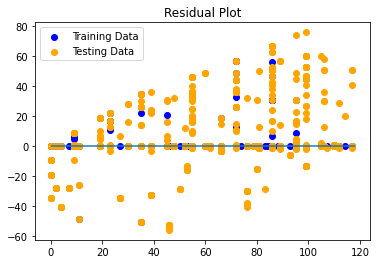

In [68]:
plt.scatter(clf.predict(X_train), clf.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(clf.predict(X_test), clf.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")